In [2]:
import sqlite3
import pandas as pd
# Create your connection.
cnx = sqlite3.connect('carigslist_data_main.db')

df = pd.read_sql_query("SELECT * FROM data", cnx)
cnx.close()

In [2]:
import json
import re
from collections import defaultdict
with open('main.6f5b9d827e678e58fdba.js') as dataFile:
    data1 = dataFile.readline()
    data2 = dataFile.readline()
    data1=data1.rstrip('\n')
    data2=data2.rstrip('\n')
#    obj = data[data.find('makes:[') : data.rfind(']')+1]

#obj=re.match(r'make:\[(.*?)\]','make:[ok]').group(1)
data1=re.sub(r',name:".*?"','',data1)
data1=re.sub(r',visibleIn:\[.*?\]','',data1)
data1=re.sub(r'label:\"','',data1)
data1=re.sub(r'\"','',data1)
data1=re.sub(r'id:','',data1)
data1=re.sub(r'makeId:','',data1)
data1=re.sub(r',aliasId:\d*','',data1)
data1=re.sub(r',mdId:\[.*?\]','',data1)
data2=re.sub(r',name:".*?"','',data2)
data2=re.sub(r',visibleIn:\[.*?\]','',data2)
data2=re.sub(r'label:\"','',data2)
data2=re.sub(r'\"','',data2)
data2=re.sub(r'id:','',data2)
data2=re.sub(r'makeId:','',data2)
data2=re.sub(r',aliasId:\d*','',data2)
data2=re.sub(r',mdId:\[.*?\]','',data2)
data1_list=data1.strip('{}').split('},{')
data1_list=[i.split(',') for i in data1_list]
data2_list=data2.strip('{}').split('},{')
data2_list=[i.split(',')[1:3] for i in data2_list]
data_dic=defaultdict(lambda: [])
for i in data2_list:
    data_dic[i[1]].append(i[0])
for i in data1_list:
    data_dic[i[1]] = data_dic.pop(i[0])

data_dic['BMW']= ['128','135','228','230','M2','M 235',' M240','318','320','323','325','328','328 d','330',
'330 e','335','340','ActiveHybrid 3','M3','428','430','435','440','M4','525','528','530','530 e','535',
'535 d','540','540 d','545','550','ActiveHybrid 5','M5','M 550','640','645','650','ALPINA B6','M6',
'735','740','740 e','745','750','760','ActiveHybrid 7','ALPINA B7','M 760','840','850','i3','i8','M2','M 235',
'M 240','M3','M4','M5','M550','M6','M 760','X5 M','X6 M','Z4 M','X6','X1','X2','X3','X4','X5 eDrive','X5 M',
'X5','X6','X6 M','Z3','Z4','Z8','1-Series','2-Series','3-Series','4-Series','5-Series','6-Series','7-Series']
data_dic['Chevrolet']=['1500', '2500','3500','Astro','Avalanche','Aveo','Beretta','Blazer','Bolt EV','Camaro','Caprice','Caprice Classic','Captiva Sport',
'Cavalier','City Express','Classic','Cobalt','Colorado','Corsica','Corvette','Cruze','Cruze Limited','Equinox',
'Express Vans','Express 1500','Express 2500','Express 3500','HHR','Impala','Lumina','Malibu','Metro','Monte Carlo',
'Prizm','S 10','S 10 Blazer','Silverado','Sonic','Spark','Spark EV','Sportvan','SS','SSR','Suburban','Tahoe',
'Tracker','TrailBlazer','TrailBlazer EXT','Traverse','Trax','Uplander','Venture','Volt']
data_dic['Mercedes-Benz']=['AMG C','AMG CLA','AMG E','AMG GL','AMG GLA','AMG GLC','AMG GLE','AMG GLS','AMG GT','AMG S','AMG SL',
'AMG SLC','CLA','CLK','CLS','SLC','SLK','SLR','SLS','CLS','GLA','GLC','GLE','GLK','GLS','Maybach','SL','CL','C 250','C 300',
'C 350','C 350e','C 400','C 450','C 63','C 220','C 230','C 240','C 280','C 32','C 320','C 43','C 55','S 63','S 65','S 55',
'S 600','E 250','E 300','E 350','E 400','E 450','E 550','E 63','E 300','E 320','E 400','E 420','E 430','E 500','E 55','G 63',
'GL 63','GL','ML 55','ML 63','ML','A','C','E','S','G','R','B','M','Sprinter']
data_dic['Toyota']= ['Corolla','PRIUS','LAND CRUISER','Highlander','4-Runner','RAV4','Tacoma',
'FJ Cruiser','Yaris','Avalon','Matrix','Tundra','Sienna','Camry','Solara','Sequoia','Venza','FCHV-adv','Tercel',
'Celica','Celica Supra','Supra','MR2','Paseo','Echo','Cressida','Cargo Van','Previa','T100','Mirai',
'86','Prius V','Prius C','Starlet','Corona','COROLLA iM','C-HR',
'CAMRY HYBRID','Prius Prime','Yaris iA']
data_dic['Hummer']=['H1','H2','H3','H3T']

for i in data_dic:
    a=[]
    for j in data_dic[i]:
        j=re.sub('[^\w\s]',' ', j)
        
        regex=re.compile(r'(\d+)',flags=re.IGNORECASE)
        j=regex.sub(r' \1 ',j)
        j=re.sub('\s+', ' ',j)        
        j=j.strip(' ')
        a.append(j)
    data_dic[i]=a

#data_dic['BMW'].sort(key = lambda s: -len(s))
#def cmp(x,y):
#    if x<y: return -1
#    if x==y: return0
#    if x>y: return 1
#data_dic['BMW'].sort(lambda x,y: cmp(len(x), len(y)))
#print(data_dic)


In [113]:
data_dic2={'Acura': ['CL', 'ILX', 'ILX Hybrid', 'Integra', 'Legend', 'MDX', 'MDX Sport Hybrid', 'NSX', 'RDX', 'RL', 'RLX',           
'RLX Sport Hybrid', 'RSX', 'SLX', 'TL', 'TLX', 'TSX', 'Vigor', 'ZDX'], 'Alfa Romeo': ['164', '4 C', '4 C Spider',
'8 c Competizione', '8 c Spider', 'Giulia', 'Spider', 'Stelvio'], 'Aston Martin': ['DB AR 1 Zagato', 'DB 11', 'DB 7',
'DB 7 Vantage', 'DB 9', 'DBS', 'Rapide', 'Rapide S', 'V 12 Vanquish', 'V 12 Vantage', 'V 12 Vantage S', 'V 8 Vantage',
'V 8 Vantage S', 'Vanquish', 'Vantage', 'Vantage GT', 'Virage'], 'Audi': ['100', '200', '80', '90', 'A 3', 'A 3 e tron', 
'A 4', 'A 4 allroad', 'A 5', 'A 6', 'A 7', 'A 8', 'allroad', 'Cabriolet', 'Q 3', 'Q 5', 'Q 5 hybrid', 'Q 7',
'R 8', 'RS 3', 'RS 4', 'RS 5', 'RS 7', 'RS 6', 'S 3', 'S 4', 'S 5', 'S 6', 'S 7', 'S 8', 'SQ 5', 'TT', 'TT RS', 'TTS'],
'Avanti Motors': ['Avanti'], 'Bentley': ['Arnage', 'Azure', 'Bentayga', 'Brooklands', 'Continental', 'Continental Flying Spur',
'Continental GT', 'Continental GTC', 'Continental Supersports', 'Flying Spur', 'Mulsanne', 'R Type', 'Turbo R', 'Turbo RL',
'Turbo RT', 'Turbo S'], 'BMW': ['1 Series M', '128 i', '135 i', '135 is', '228 i', '228 i xDrive', '230 i', '230 i xDrive', '318 i', 
'318 iS', '318 ti', '320 i', '320 i xDrive', '323 ci', '323 i', '323 is', '325', '325 Ci', '325 e', 
'325 es', '325 i', '325 is', '325 iX', '325 xi', '328 Ci', '328 d', '328 d xDrive', '328 i', 
'328 i Gran Turismo', '328 i xDrive', '328 iS', '328 xi', '330 Ci', '330 e', '330 i', 
'330 i Gran Turismo', '330 i xDrive', '330 xi', '335 d', '335 i', '335 i Gran Turismo', 
'335 i xDrive', '335 is', '335 xi', '340 i', '340 i Gran Turismo', '340 i xDrive', '428 i', 
'428 i Gran Coupe', '428 i Gran Coupe', '428 i xDrive', '430 i', '430 i Gran Coupe', 
'430 i Gran Coupe', '430 i xDrive', '435 i', '435 i Gran Coupe', '435 i Gran Coupe', 
'435 i xDrive', '440 i', '440 i Gran Coupe', '440 i Gran Coupe', '440 i xDrive', '524 td', 
'525 i', '525 xi', '528 e', '528 i', '528 i xDrive', '528 xi', '530 e', '530 e xDrive', '530 i', 
'530 i xDrive', '530 xi', '533 i', '535 d', '535 d xDrive', '535 i', '535 i Gran Turismo',
 '535 i Gran Turismo', '535 i xDrive', '535 xi', '540 d xDrive', '540 i', '540 i xDrive', 
 '545 i', '550 i', '550 i Gran Turismo', '550 i Gran Turismo', '550 i xDrive', '633 CSi', 
 '635 CSi', '640 i', '640 i Gran Coupe', '640 i Gran Coupe', '640 i Gran Turismo', 
 '640 i xDrive', '645 Ci', '650 i', '650 i Gran Coupe', '650 i Gran Coupe', '650 i xDrive',
 '733 i', '735 i', '735 iL', '740 e xDrive', '740 i', '740 i xDrive', '740 iL', '740 Ld xDrive', 
 '740 Li', '740 Li xDrive', '745 i', '745 Li', '750 i', '750 i xDrive', '750 iL', '750 Li',
 '750 Li xDrive', '760 i', '760 Li', '840 Ci', '850 Ci', '850 CSi', '850 i', 'ActiveHybrid 3', 
 'ActiveHybrid 5', 'ActiveHybrid 7', 'ActiveHybrid X 6', 'ALPINA B 6 xDrive Gran Coupe', 
 'ALPINA B 7', 'ALPINA B 7 xDrive', 'i 3', 'i 8', 'L 6', 'L 7', 'M Coupe', 'M Roadster', 
 'M 2', 'M 235 i', 'M 235 i xDrive', 'M 240 i', 'M 240 i xDrive', 'M 3', 'M 4', 'M 5', 
 'M 550 i xDrive', 'M 6', 'M 6 Gran Coupe', 'M 760 i xDrive', 'M 850 i xDrive', 
 'X 1', 'X 2', 'X 3', 'X 4', 'X 5', 'X 5 M', 'X 6', 'X 6 M', 'X 7', 'Z 3', 'Z 4', 'Z 8'], 'Buick': ['Cascada', 'Century', 'Enclave', 'Encore', 'Envision',
'LaCrosse', 'LeSabre', 'Lucerne', 'Park Avenue', 'Rainier', 'Reatta', 'Regal', 'Regal Sportback', 'Regal TourX', 'Rendezvous',
'Riviera', 'Roadmaster', 'Skylark', 'Terraza', 'Verano'], 'Cadillac': ['Allante', 'ATS', 'ATS V', 'Brougham', 'Catera', 'CT 6',
'CT 6 PLUG IN', 'CTS', 'CTS V', 'DeVille', 'DTS', 'Eldorado', 'ELR', 'Escalade', 'Escalade ESV', 'Escalade EXT', 'Escalade Hybrid',
'Fleetwood', 'Seville', 'Sixty Special', 'SRX', 'STS', 'XLR', 'XT 4', 'XT 5', 'XTS'], 'Chrysler': ['200', '300', '300 C', '300 M', 'Aspen', 'Aspen Hybrid', 'Cirrus', 'Concorde',
'Crossfire','Grand Voyager', 'Imperial', 'LeBaron', 'LHS', 'New Yorker', 'Pacifica', 'Pacifica Hybrid', 'Prowler', 'PT Cruiser',
'Sebring', 'TC by Maserati', 'Town Country', 'Voyager'], 'Daewoo': ['Lanos', 'Leganza', 'Nubira'], 'Daihatsu': ['Charade', 'Rocky'],
'Dodge': ['Avenger', 'Caliber', 'Caravan', 'Challenger', 'Charger', 'Colt', 'D 150', 'D 250', 'D 350', 'Dakota', 'Dart', 'Daytona',
'Durango', 'Durango Hybrid', 'Dynasty', 'Grand Caravan', 'Intrepid', 'Journey', 'Magnum', 'Monaco', 'Neon', 'Nitro', 'Shadow', 'Spirit',
'Sprinter', 'SRT Viper', 'Stealth', 'Stratus', 'Viper', 'W 150', 'W 250', 'W 350'], 'Ferrari': ['348', '360 Modena', '360 Spider', '456 GT', '456 M', '458 Italia', '458 Speciale', '458 Spider',
'488 GTB', '488 Spider', '512 M', '512 TR', '550 Barchetta', '550 Maranello', '575 M', '599 GTB Fiorano', '599 GTO', '612 Scaglietti',
'California', 'Challenge Stradale', 'Enzo', 'F 12 berlinetta', 'F 355', 'F 40', 'F 430', 'F 50', 'FF', 'GTC 4 Lusso', 'Mondial',
'Mondial t', 'Superamerica', 'Testarossa'], 'FIAT': ['124 Spider', '500', '500 C', '500 e', '500 L', '500 X'], 'Fisker': ['Karma'],
'Ford': ['Aerostar', 'Aspire', 'Bronco', 'C Max Energi', 'C Max Hybrid', 'Club Wagon', 'Contour', 'Crown Victoria', 'Econoline Vans',
'E 150', 'E 250', 'E 350', 'E 350 Super Duty', 'EcoSport', 'Edge', 'Escape', 'Escape Hybrid', 'Escort', 'Excursion',
'Expedition all', 'Expedition', 'Expedition EL', 'Expedition Max', 'Explorer', 'Explorer Sport', 'Explorer Sport Trac',
'F 150', 'F 250', 'F 350', 'F 450', 'Festiva', 'Fiesta', 'Five Hundred', 'Flex', 'Focus',
'Focus Electric', 'Focus RS', 'Focus ST', 'Freestar', 'Freestyle', 'Fusion', 'Fusion Energi', 'Fusion Hybrid', 'GT', 'LTD', 
'Mustang', 'Probe', 'Ranger', 'Sedan Police Interceptor', 'Shelby GT 350', 'Shelby GT 500', 'Taurus', 'Taurus X',
 'Tempo', 'Thunderbird', 'Transit Connect', 'Transit 150', 'Transit 250', 'Transit 350', 'Utility Police Interceptor', 
 'Windstar', 'ZX 2'], 'Geo': ['Metro', 'Prizm', 'Storm', 'Tracker'], 'GMC': ['1500', '2500',
 '3500', 'Acadia', 'Acadia Limited', 'Canyon', 'Envoy', 'Envoy XL', 'Envoy XUV', 'Jimmy', 'Pickup', 'Rally', 'S 15 Jimmy',
 'Safari', 'Savana Vans', 'Savana 1500', 'Savana 2500', 'Savana 3500', 'Vandura', 'Sierra Trucks', 
 'Sierra 1500', 'Sierra 1500 Hybrid', 'Sierra 1500 Limited', 'Sierra 2500', 'Sierra 3500', 'Sonoma', 'Suburban',
 'Terrain', 'Yukon', 'Yukon Hybrid', 'Yukon XL'], 'Honda': ['Accord', 'Accord Crosstour', 'Accord Hybrid',
 'Accord Plug In Hybrid', 'Civic', 'Civic Hybrid', 'Civic Type R', 'Clarity Fuel Cell', 'Clarity Plug In Hybrid',
 'CR V', 'CR Z', 'Crosstour', 'CRX', 'del Sol', 'Element', 'Fit', 'Fit EV', 'HR V', 'Insight', 'Odyssey', 'Passport',
 'Pilot', 'Prelude', 'Ridgeline', 'S 2000'], 'Hummer': ['H 1', 'H 1 Alpha', 'H 2', 'H 3', 'H 3 T'], 'Hyundai':
 ['Accent', 'Azera', 'Elantra', 'Elantra GT', 'Elantra Touring', 'Entourage', 'Equus', 'Excel', 'Genesis', 
 'Genesis Coupe', 'Ioniq EV', 'Ioniq Hybrid', 'Ioniq Plug In Hybrid', 'Kona', 'Santa Fe', 'Santa Fe Sport',
 'Scoupe', 'Sonata', 'Sonata Hybrid', 'Sonata Plug In Hybrid', 'Tiburon', 'Tucson', 'Veloster', 'Veracruz',
 'XG 300', 'XG 350', 'G 70', 'G 80','G 90'], 'INFINITI': ['EX 35', 'EX 37', 'FX 35', 'FX 37', 'FX 45', 'FX 50',
 'G 20', 'G 25', 'G 35', 'G 37', 'I 30', 'I 35', 'IPL G', 'J 30', 'JX 35', 'M 35', 'M 35 h',
 'M 37', 'M 45', 'M 56', 'M 30', 'Q 40', 'Q 45', 'Q 50', 'Q 50 Hybrid', 'Q 60', 'Q 60 IPL', 'Q 70', 'Q 70 h', 
 'Q 70 L', 'QX 30', 'QX 4', 'QX 50', 'QX 56', 'QX 60', 'QX 60 Hybrid', 'QX 70', 'QX 80'], 
 'International': ['CXT', 'MXT', 'RXT'], 'Isuzu': ['Amigo', 'Ascender', 'Axiom', 'Impulse', 'Isuzu Trucks',
 'Hombre', 'i 280', 'i 290', 'i 350', 'i 370', 'Oasis', 'Rodeo', 'Rodeo Sport', 'Stylus', 'Trooper', 
 'VehiCROSS'], 'Jaguar': ['E PACE', 'F PACE', 'F TYPE', 'I PACE', 'S Type', 'Super V 8', 'Super V 8 Portfolio',
 'Vanden Plas', 'X Type', 'XE', 'XF', 'XJ', 'XJ 12', 'XJ 6', 'XJ 8', 'XJR', 'XJR S', 'XJS', 'XK', 'XK 8', 'XKR'], 
 'Jeep': ['Cherokee', 'Comanche', 'Commander', 'Compass', 'Grand Cherokee', 'Grand Wagoneer', 'Liberty', 'New Compass',
 'Patriot', 'Renegade', 'Wrangler', 'Wrangler JK', 'Wrangler JK Unlimited', 'Wrangler Unlimited'], 'Karma': 
 ['Revero'], 'Kia': ['Amanti', 'Borrego', 'Cadenza', 'Forte', 'Forte Koup', 'K 900', 'Niro', 'Niro Plug In Hybrid',
 'Optima', 'Optima Hybrid', 'Optima Plug In Hybrid', 'Rio', 'Rio 5', 'Rondo', 'Sedona', 'Sephia', 'Sorento', 
 'Soul', 'Soul EV', 'Spectra', 'Spectra 5', 'Sportage', 'Stinger'], 'Koenigsegg': ['CCX'], 'Lamborghini':
 ['Aventador', 'Aventador S', 'Diablo', 'Gallardo', 'Huracan', 'Murcielago'], 'Land Rover': ['Defender', 
 'Discovery', 'Discovery Sport', 'Freelander', 'LR 2', 'LR 3', 'LR 4', 'Range Rover', 'Range Rover Evoque',
 'Range Rover Sport', 'Range Rover Velar'], 'Lexus': ['CT 200 h', 'ES all', 'ES 250', 'ES 300', 'ES 300 h',
 'ES 330', 'ES 350', 'GS all', 'GS 200 t', 'GS 300', 'GS 350', 'GS 400', 'GS 430', 'GS 450 h', 'GS 460', 'GS F', 
 'GX 460', 'GX 470', 'HS 250 h', 'IS all', 'IS 200 t', 'IS 250', 'IS 250 C', 'IS 300', 'IS 350', 'IS 350 C', 'IS F', 
 'LC 500', 'LC 500 h', 'LFA', 'LS all', 'LS 400', 'LS 430', 'LS 460', 'LS 500', 'LS 500 h', 'LS 600 h L', 'LX all',
 'LX 450', 'LX 470', 'LX 570', 'NX 200 t', 'NX 300', 'NX 300 h', 'RC 200 t', 'RC 300', 'RC 350', 'RC F', 'RX all', 
 'RX 300', 'RX 330', 'RX 350', 'RX 350 L', 'RX 400 h', 'RX 450 h', 'RX 450 hL', 'SC all', 'SC 300', 'SC 400',
 'SC 430'], 'Lincoln': ['Aviator', 'Blackwood', 'Continental', 'LS', 'Mark LT', 'Mark VII', 'Mark VIII', 'MKC',
 'MKS', 'MKT', 'MKX', 'MKZ', 'MKZ Hybrid', 'Navigator', 'Navigator L', 'Town Car', 'Zephyr'], 'Lotus': ['Elan',
 'Elise', 'Esprit', 'Esprit V 8', 'Evora', 'Evora 400', 'Exige', 'Exige S'], 'Maserati': ['Coupe', 'Ghibli', 
 'GranSport', 'GranSport Spyder', 'GranTurismo', 'Levante', 'Quattroporte', 'Spyder'], 'Maybach': ['Landaulet', 
 '57', '62'], 'Mazda': ['323', '626', '929', 'B Series Trucks', 'B 2200', 'B 2300', 'B 2500', 'B 2600',
 'B 3000', 'B 4000', 'Pickup', 'CX 3', 'CX 5', 'CX 7', 'CX 9', 'Mazda 2', 'Mazda 3', 'Mazda 5', 'Mazda 6', 
 'MazdaSpeed Miata MX 5', 'MazdaSpeed Protege', 'MazdaSpeed 3', 'MazdaSpeed 6', 'Millenia', 'MPV', 'MX 3', 
 'MX 5 Miata', 'MX 5 Miata RF', 'MX 6', 'Navajo', 'Protege', 'Protege 5', 'RX 7', 'RX 8', 'Tribute', 'Tribute Hybrid'],
 'McLaren': ['570 GT', '570 S', '650 S', '675 LT', '720 S', 'MP 4 12 C'], 'Mercedes Benz': ['190 D','190 E','240 D','260 E','280 CE','280 E','300 CD','300 CE','300 D','300 E','300 SD','300 SDL',
'300 SE','300 SEL','300 SL','300 TD','300 TE','350 SD','350 SDL','380 SE','380 SEC','380 SEL','380 SL',
'380 SLC','400 E','400 SE','400 SEL','420 SEL','500 E','500 SEC','500 SEL','500 SL','560 SEC','560 SEL',
'560 SL','600 SEC','600 SEL','600 SL','A 220','AMG GT','B 250 e','B Class Electric','C 220','C 230','C 240',
'C 250','C 280','C 300','C 32','C 320','C 350','C 350 e','C 36','C 400','C 43','C 450','C 55','C 63','CL 500',
'CL 55','CL 550','CL 600','CL 63','CL 65','CLA 250','CLA 45','CLK 320','CLK 350','CLK 430','CLK 500','CLK 55',
'CLK 550','CLK 63','CLS 400','CLS 450','CLS 500','CLS 53','CLS 55','CLS 550','CLS 63','E 250','E 300','E 320',
'E 350','E 400','E 420','E 43','E 430','E 450','E 500','E 53','E 55','E 550','E 63','G 500','G 55','G 550','G 63',
'G 65','GL 320','GL 350','GL 450','GL 550','GL 63','GLA 250','GLA 45','GLC 300','GLC 350 e','GLC 43','GLC 63',
'GLE 300 d','GLE 350','GLE 400','GLE 43','GLE 450','GLE 550 e','GLE 63','GLK 250','GLK 350','GLS 350 d','GLS 450',
'GLS 550','GLS 63','Maybach S 550','Maybach S 560','Maybach S 600','Maybach S 650','Metris','ML 250','ML 320',
'ML 350','ML 400','ML 430','ML 450','ML 500','ML 55','ML 550','ML 63','R 320','R 350','R 500','R 63','S 320',
'S 350','S 400','S 420','S 430','S 450','S 500','S 55','S 550','S 550e','S 560','S 600','S 63','S 65','SL 320',
'SL 400','SL 450','SL 500','SL 55','SL 550','SL 600','SL 63','SL 65','SLC 300','SLC 43','SLK 230','SLK 250',
'SLK 280','SLK 300','SLK 32','SLK 320','SLK 350','SLK 55','SLR','SLS','Sprinter', 'CLA', 
 'CLK', 'CLS', 'SLC', 'SLK', 'SLS', 'CLS', 'GLA', 'GLC', 'GLE', 'GLK', 'GLS', 'Maybach', 'SL', 'CL','GL',
 'ML', 'A', 'C', 'E', 'S', 'G', 'R', 'B', 'M'], 'Mercury': ['Capri', 'Colony Park', 'Cougar', 
 'Grand Marquis', 'Marauder', 'Mariner', 'Mariner Hybrid', 'Milan', 'Milan Hybrid', 'Montego', 'Monterey', 
 'Mountaineer', 'Mystique', 'Sable', 'Topaz', 'Tracer', 'Villager'], 'Mitsubishi': ['3000 GT', 'Diamante', 'Eclipse',
 'Eclipse Cross', 'Endeavor', 'Expo', 'Galant', 'i MiEV', 'Lancer', 'Lancer Evolution', 'Lancer Sportback', 
 'Mirage', 'Mirage G 4', 'Montero', 'Montero Sport', 'Outlander', 'Outlander PHEV', 'Outlander Sport', 
 'Precis', 'Raider'], 'Morgan': ['Aero 8', 'Plus 8', 'Roadster'], 'Nissan': ['200 SX', '240 SX', '300 ZX', 
 '350 Z', '370 Z', 'Altima', 'Altima Hybrid', 'Armada', 'Cube', 'Frontier', 'GT R', 'Juke', 'Kicks', 'Leaf',
 'Maxima', 'Murano', 'Murano CrossCabriolet', 'Murano Hybrid', 'NV Vans', 'NV Cargo', 'NV Cargo NV 1500', 
 'NV Cargo NV 2500 HD', 'NV Cargo NV 3500 HD', 'NV Passenger', 'NV Passenger NV 3500 HD', 'NV 200', 'NV 200',
 'NX', 'Pathfinder', 'Pathfinder Hybrid', 'Pickup', 'Quest', 'Rogue', 'Rogue Hybrid', 'Rogue Select', 
 'Rogue Sport', 'Sentra', 'Stanza', 'Titan', 'Titan XD', 'Versa', 'Versa Note', 'Xterra'], 'Oldsmobile': 
 ['Achieva', 'Alero', 'Aurora', 'Bravada', 'Custom Cruiser', 'Cutlass', 'Cutlass Calais', 'Cutlass Ciera',
 'Cutlass Cruiser', 'Cutlass Supreme', 'Eighty Eight', 'Intrigue', 'LSS', 'Ninety Eight', 'Regency', 
 'Silhouette', 'Toronado'], 'Panoz': ['AIV Roadster', 'Esperante', 'Roadster'], 'Peugeot': ['505'],
 'Plymouth': ['Acclaim', 'Breeze', 'Colt', 'Grand Voyager', 'Laser', 'Neon', 'Prowler', 'Sundance',
 'Voyager'], 'Pontiac': ['6000', 'Aztek', 'Bonneville', 'Firebird', 'G 3', 'G 5', 'G 6', 'G 8', 'Grand Am', 
 'Grand Prix', 'GTO', 'LeMans', 'Montana', 'Montana SV 6', 'Solstice', 'Sunbird', 'Sunfire', 'T 1000',
 'Torrent', 'Trans Sport', 'Vibe'], 'Porsche': ['718 Boxster', '718 Cayman', '911', '918 Spyder', '928', 
 '944', '968', 'Boxster', 'Carrera GT', 'Cayenne', 'Cayenne E Hybrid', 'Cayenne Hybrid', 'Cayman', 'Macan', 
 'Panamera', 'Panamera e Hybrid', 'Panamera e Hybrid Sport Turismo', 'Panamera Hybrid', 'Panamera Sport Turismo'],
 'Qvale': ['Mangusta'], 'Rolls-Royce': ['40 50 HP Silver Ghost', 'Corniche', 'Dawn', 'Ghost', 'Park Ward', 'Phantom', 'Phantom Coupe',
 'Phantom Drophead Coupe', 'Phantom VI', 'Silver Dawn', 'Silver Seraph', 'Silver Spur', 'Silver Spur II',
 'Wraith'], 'Saab': ['9 2 X', '9 3', '9 3 X', '9 4 X', '9 5', '9 7 X', '900', '9000'], 
 'Saturn': ['Astra', 'Aura', 'Aura Hybrid all', 'Aura Green Line', 'Aura Hybrid', 'Ion', 'L', 'LS', 'LW',
 'Outlook', 'Relay', 'SC', 'Sky', 'SL', 'SW', 'Vue', 'Vue Hybrid all', 'Vue Green Line', 'Vue Hybrid'], 
 'Scion': ['FR S', 'iA', 'iM', 'iQ', 'tC', 'xA', 'xB', 'xD'], 'smart': ['ForTwo', 'ForTwo Electric Drive'],
 'Spyker': ['C 8', 'C 8 Aileron', 'C 8 Laviolette'], 'Sterling': ['827'], 'Subaru': ['Ascent', 'B 9 Tribeca', 
 'Baja', 'BRZ', 'Crosstrek', 'Crosstrek Hybrid', 'Forester', 'Impreza', 'Impreza Outback Sport', 'Impreza WRX', 
 'Impreza WRX STi', 'Justy', 'Legacy', 'Loyale', 'Outback', 'SVX', 'Tribeca', 'WRX', 'WRX STI', 'XT', 
 'XV Crosstrek', 'XV Crosstrek Hybrid'], 'Suzuki': ['Aerio', 'Equator', 'Esteem', 'Forenza', 'Grand Vitara',
 'Kizashi', 'Reno', 'Samurai', 'Sidekick', 'Swift', 'SX 4', 'Verona', 'Vitara', 'X 90', 'XL 7'], 'Tesla': ['Model 3',
 'Model S', 'Model X', 'Roadster'], 'Toyota': ['Corolla', 'PRIUS', 'LAND CRUISER', 'Highlander', '4 Runner', 
 'RAV 4', 'Tacoma', 'FJ Cruiser', 'Yaris', 'Avalon', 'Matrix', 'Tundra', 'Sienna', 'Camry', 'Solara', 'Sequoia', 
 'Venza', 'FCHV adv', 'Tercel', 'Celica', 'Celica Supra', 'Supra', 'MR 2', 'Paseo', 'Echo', 'Cressida', 
 'Cargo Van', 'Previa', 'T 100', 'Mirai', '86', 'Prius V', 'Prius C', 'Starlet', 'Corona', 'COROLLA iM', 'C HR',
 'CAMRY HYBRID', 'Prius Prime', 'Yaris iA'], 'Volkswagen': ['Atlas', 'Beetle', 'Cabrio', 'Cabriolet', 'CC',
 'Corrado', 'e Golf', 'Eos', 'Eurovan', 'Fox', 'GLI', 'Golf', 'Golf Alltrack', 'Golf GTI', 'Golf R', 'Golf SportWagen',
 'GTI', 'Jetta', 'Jetta Hybrid', 'Jetta SportWagen', 'New Beetle', 'New Cabrio', 'Passat', 'Phaeton', 'R 32',
 'Rabbit', 'Routan', 'Tiguan', 'Tiguan Limited', 'Touareg', 'Touareg 2', 'Touareg Hybrid'], 'Volvo': 
 ['240', '740', '850', '940', '960', 'C 30', 'C 70', 'Coupe', 'S 40', 'S 60', 'S 60 Cross Country', 'S 60 Inscription', 
 'S 70', 'S 80', 'S 90', 'S 90 Hybrid', 'V 40', 'V 50', 'V 60', 'V 60 Cross Country', 'V 70', 'V 90', 
 'V 90 Cross Country', 'XC 40', 'XC 60', 'XC 60 Hybrid', 'XC 70', 'XC 90', 'XC 90 Hybrid'], 'Yugo': ['Cabrio'],
 'RAM': ['1500', '2500', '3500', '4500','5500','Cargo', 'ProMaster', 'ProMaster City',
         'Ram 50','Ramcharger'],
'Chevrolet': ['Silverado','1500', '2500', '3500','Astro','Avalanche','Aveo','Aveo5','Beretta','Blazer','Bolt','C K Truck','Camaro','Caprice','Captiva Sport',
'Cavalier','Celebrity','Chevette','Citation','City Express','Cobalt','Colorado','Corsica','Corvette','Cruze',
'El Camino','Equinox','Express','Express 1500','Express 2500','Express 3500','Express 4500','G10','G20','G30','HHR',
'Impala','Kodiak C 4500','Lumina','Lumina APV','LUV','Malibu','Metro','Monte Carlo','Nova','Prizm','S 10 Blazer',
'S 10','Silverado 1500','Silverado 2500','Silverado 3500','Sonic','Spark','Spectrum','Sprint','SS','SSR',
'Suburban','Tahoe','Tracker','TrailBlazer','TrailBlazer EXT','Traverse','Trax','Uplander','Venture','Volt'], 
 'MINI': ['Clubman', 'Convertible', 'Cooper', 'Cooper Clubman', 'Cooper Countryman', 'Cooper S', 'Cooper S Clubman',
 'Cooper S Countryman', 'Countryman', 'Coupe', 'E Countryman', 'Hardtop', 'Paceman', 'Roadster']}

In [114]:
import dill
#sorted(list(d_make_models.keys()))
dill.dump(data_dic2, open('data_dic2.pkd', 'wb'))
data_dic2 = dill.load(open('data_dic2.pkd', 'rb'))

In [64]:
# trimmed tex --> new column
from fuzzywuzzy import fuzz
import re
def trim_text(string1,string2):
    if string1==None: string1=''
    if string2==None: string2=''
    string=clean_up(string1+' '+string2)
    return(string)
    
def clean_up(string):
    if string==None: string=''
    string=re.sub('[^\w\s]',' ', string)
    regex=re.compile(r'(\d+)',flags=re.I)
    string=regex.sub(r' \1 ',string)
    string=re.sub(r'mercedes',' Mercedes Benz ',string,flags=re.I)
    string=re.sub(r'toyota\s+scion',' Scion ',string,flags=re.I)
    string=re.sub(r'toyota\s+lexus',' Lexus ',string,flags=re.I)
    string=re.sub(r'ford\s+mercury',' Mercury ',string,flags=re.I)
    string=re.sub(r'ford\s+mercury',' Mercury ',string,flags=re.I)
    string=re.sub(r'bmw\s+mini',' MINI ',string,flags=re.I)
    string=re.sub(r'\bchev\b|\bchevy\b',' Chevrolet ',string,flags=re.I)
    string=re.sub(r'\bvw\b',' Volkswagen ',string,flags=re.I)
    if re.search(r'ram',string,flags=re.I) and re.search(r'dodge',string,flags=re.I):
        string=re.sub(r'dodge',' RAM ',string,flags=re.I)
    string=re.sub('\s+', ' ',string)       
    string=string.strip(' ')
    return string


In [65]:
df['text']=None
n=len(df['model'])
df.loc[0:n,['text']]=list(map(trim_text, df['model'][0:n],df['Name'][0:n]))

In [66]:
from fuzzywuzzy import fuzz
import re
def fill_year(string):
    year_return=None
    if string=='': return year_return
    for word in re.split('\s',string):
        if word.isdigit(): 
            if (int(word) <=2019) & (int(word) >= 1900):
                year_return=int(word)
                break
    return year_return

df['year0']=None
n=len(df['model'])
df.loc[0:n,['year0']]=list(map(fill_year, df['text'][0:n]))

In [82]:
from fuzzywuzzy import fuzz
import re
from functools import reduce

def add(x, y):
    return x + y

def choose_big(x, y):
    return x if len(x)>len(y) else y

def find_make(make,string):
    if re.search(r'\b%s\b' % make, string,flags=re.I):
        return make
    else:
        return ''
def find_model(model,string):
    model_split=model.split(' ')
    if len(model_split)>1:
        regex=re.compile(r'\b%s\b|\b%s\b' % (' '.join(model_split),''.join(model_split)),flags=re.I)
    else:
        regex=re.compile(r'\b%s\b' % model,flags=re.I)
    if re.search(regex,string):
        return model
    else:
        return ''

makes=list(data_dic2.keys())
n_makes=len(makes)
def mm(string):       
    make_return=None
    model_return=None
    make_return=reduce(add, map(find_make, makes,[string]*n_makes))
    if ('MINI' in make_return) and(make_return!='MINI'):make_return=re.sub('MINI','',make_return)
    if ('Mercedes' in make_return) and('Maybach' in make_return):make_return='Mercedes Benz'
    if make_return!='':
        try:
            n_models=len(data_dic2[make_return])
        except:
            return make_return,None
        model_return=reduce(choose_big, map(find_model, data_dic2[make_return],[string]*n_models))
        if make_return=='Chevrolet':
            if model_return=='1500': model_return='Silverado 1500'
            if model_return=='2500': model_return='Silverado 2500'
            if model_return=='3500': model_return='Silverado 3500'
            if model_return=='Silverado': model_return='Silverado 1500'
            if model_return=='Express': model_return='Express 1500'
    if make_return=='': make_return=None
    if model_return=='': model_return=None        
    return make_return, model_return

In [61]:
df['text'][346]

'2007 bmw 3 series 328 i 2007 BMW 328 i'

In [68]:
#fix none
import re
from functools import reduce

makes=list(data_dic2.keys())
n_makes=len(makes)
def fix_none(string):       
    make_return=None
    model_return=None
    dic_models={}
    for i in range(n_makes):
        make=makes[i]
        models=data_dic2[make]
        n_models=len(models)
        model_return=reduce(choose_big, map(find_model, data_dic2[make],[string]*n_models))
        dic_models[make]=model_return
    make_return,model_return=sorted(dic_models.items(), key=lambda k: len(k[1]), reverse=True)[0]
    if make_return=='Chevrolet':
        if model_return=='1500': model_return='Silverado 1500'
        if model_return=='2500': model_return='Silverado 2500'
        if model_return=='3500': model_return='Silverado 3500'
        if model_return=='Silverado': model_return='Silverado 1500'
        if model_return=='Express': model_return='Express 1500'
    if model_return=='': 
        make_return=None
        model_return=None
    return make_return, model_return

In [69]:
s='1980 Express'
fix_none(s)

('Chevrolet', 'Express 1500')

In [70]:
df['make0']=None
df['model0']=None
n=len(df['model'])
df.loc[0:n,['make0','model0']]=list(map(mm, df['text'][0:n]))

In [98]:
#fix BMW
data_dic2['BMW']= ['1 Series M', '128 i', '135 i', '135 is', '228 i', '228 i xDrive', '230 i', '230 i xDrive', '318 i', 
'318 iS', '318 ti', '320 i', '320 i xDrive', '323 ci', '323 i', '323 is', '325', '325 Ci', '325 e', 
'325 es', '325 i', '325 is', '325 iX', '325 xi', '328 Ci', '328 d', '328 d xDrive', '328 i', 
'328 i Gran Turismo', '328 i xDrive', '328 iS', '328 xi', '330 Ci', '330 e', '330 i', 
'330 i Gran Turismo', '330 i xDrive', '330 xi', '335 d', '335 i', '335 i Gran Turismo', 
'335 i xDrive', '335 is', '335 xi', '340 i', '340 i Gran Turismo', '340 i xDrive', '428 i', 
'428 i Gran Coupe', '428 i Gran Coupe', '428 i xDrive', '430 i', '430 i Gran Coupe', 
'430 i Gran Coupe', '430 i xDrive', '435 i', '435 i Gran Coupe', '435 i Gran Coupe', 
'435 i xDrive', '440 i', '440 i Gran Coupe', '440 i Gran Coupe', '440 i xDrive', '524 td', 
'525 i', '525 xi', '528 e', '528 i', '528 i xDrive', '528 xi', '530 e', '530 e xDrive', '530 i', 
'530 i xDrive', '530 xi', '533 i', '535 d', '535 d xDrive', '535 i', '535 i Gran Turismo',
 '535 i Gran Turismo', '535 i xDrive', '535 xi', '540 d xDrive', '540 i', '540 i xDrive', 
 '545 i', '550 i', '550 i Gran Turismo', '550 i Gran Turismo', '550 i xDrive', '633 CSi', 
 '635 CSi', '640 i', '640 i Gran Coupe', '640 i Gran Coupe', '640 i Gran Turismo', 
 '640 i xDrive', '645 Ci', '650 i', '650 i Gran Coupe', '650 i Gran Coupe', '650 i xDrive',
 '733 i', '735 i', '735 iL', '740 e xDrive', '740 i', '740 i xDrive', '740 iL', '740 Ld xDrive', 
 '740 Li', '740 Li xDrive', '745 i', '745 Li', '750 i', '750 i xDrive', '750 iL', '750 Li',
 '750 Li xDrive', '760 i', '760 Li', '840 Ci', '850 Ci', '850 CSi', '850 i', 'ActiveHybrid 3', 
 'ActiveHybrid 5', 'ActiveHybrid 7', 'ActiveHybrid X 6', 'ALPINA B 6 xDrive Gran Coupe', 
 'ALPINA B 7', 'ALPINA B 7 xDrive', 'i 3', 'i 8', 'L 6', 'L 7', 'M Coupe', 'M Roadster', 
 'M 2', 'M 235 i', 'M 235 i xDrive', 'M 240 i', 'M 240 i xDrive', 'M 3', 'M 4', 'M 5', 
 'M 550 i xDrive', 'M 6', 'M 6 Gran Coupe', 'M 760 i xDrive', 'M 850 i xDrive', 
 'X 1', 'X 2', 'X 3', 'X 4', 'X 5', 'X 5 M', 'X 6', 'X 6 M', 'X 7', 'Z 3', 'Z 4', 'Z 8']
#fix Toyota / change function to one output before running
df.loc[(df['make0']=='BMW'), ['make0','model0']]=list(map(mm, df['text'][(df['make0']=='BMW')]))
data_dic2['BMW']=['1 Series', '2 Series', '3 Series', '4 Series', '5 Series',
'6 Series', '7 Series']
#fix Toyota / change function to one output before running
df.loc[(df['make0']=='BMW')&(df['model0'].isnull()), ['make0','model0']]=list(map(mm, df['text'][(df['make0']=='BMW')&(df['model0'].isnull())]))
data_dic2['BMW']= ['1 Series M', '128 i', '135 i', '135 is', '228 i', '228 i xDrive', '230 i', '230 i xDrive', '318 i', 
'318 iS', '318 ti', '320 i', '320 i xDrive', '323 ci', '323 i', '323 is', '325', '325 Ci', '325 e', 
'325 es', '325 i', '325 is', '325 iX', '325 xi', '328 Ci', '328 d', '328 d xDrive', '328 i', 
'328 i Gran Turismo', '328 i xDrive', '328 iS', '328 xi', '330 Ci', '330 e', '330 i', 
'330 i Gran Turismo', '330 i xDrive', '330 xi', '335 d', '335 i', '335 i Gran Turismo', 
'335 i xDrive', '335 is', '335 xi', '340 i', '340 i Gran Turismo', '340 i xDrive', '428 i', 
'428 i Gran Coupe', '428 i Gran Coupe', '428 i xDrive', '430 i', '430 i Gran Coupe', 
'430 i Gran Coupe', '430 i xDrive', '435 i', '435 i Gran Coupe', '435 i Gran Coupe', 
'435 i xDrive', '440 i', '440 i Gran Coupe', '440 i Gran Coupe', '440 i xDrive', '524 td', 
'525 i', '525 xi', '528 e', '528 i', '528 i xDrive', '528 xi', '530 e', '530 e xDrive', '530 i', 
'530 i xDrive', '530 xi', '533 i', '535 d', '535 d xDrive', '535 i', '535 i Gran Turismo',
 '535 i Gran Turismo', '535 i xDrive', '535 xi', '540 d xDrive', '540 i', '540 i xDrive', 
 '545 i', '550 i', '550 i Gran Turismo', '550 i Gran Turismo', '550 i xDrive', '633 CSi', 
 '635 CSi', '640 i', '640 i Gran Coupe', '640 i Gran Coupe', '640 i Gran Turismo', 
 '640 i xDrive', '645 Ci', '650 i', '650 i Gran Coupe', '650 i Gran Coupe', '650 i xDrive',
 '733 i', '735 i', '735 iL', '740 e xDrive', '740 i', '740 i xDrive', '740 iL', '740 Ld xDrive', 
 '740 Li', '740 Li xDrive', '745 i', '745 Li', '750 i', '750 i xDrive', '750 iL', '750 Li',
 '750 Li xDrive', '760 i', '760 Li', '840 Ci', '850 Ci', '850 CSi', '850 i', 'ActiveHybrid 3', 
 'ActiveHybrid 5', 'ActiveHybrid 7', 'ActiveHybrid X 6', 'ALPINA B 6 xDrive Gran Coupe', 
 'ALPINA B 7', 'ALPINA B 7 xDrive', 'i 3', 'i 8', 'L 6', 'L 7', 'M Coupe', 'M Roadster', 
 'M 2', 'M 235 i', 'M 235 i xDrive', 'M 240 i', 'M 240 i xDrive', 'M 3', 'M 4', 'M 5', 
 'M 550 i xDrive', 'M 6', 'M 6 Gran Coupe', 'M 760 i xDrive', 'M 850 i xDrive', 
 'X 1', 'X 2', 'X 3', 'X 4', 'X 5', 'X 5 M', 'X 6', 'X 6 M', 'X 7', 'Z 3', 'Z 4', 'Z 8','1 Series', '2 Series', '3 Series', '4 Series', '5 Series',
'6 Series', '7 Series']                                                                                                                               

In [115]:
#fix none takes long
df.loc[(df['make0'].isnull())&(df['year0']>2000), ['make0','model0']]=list(map(fix_none, df['text'][(df['make0'].isnull())&(df['year0']>2000)]))

In [109]:
#fix benz
df.loc[(df['make0']=='Ford'), ['make0','model0']]=list(map(mm, df['text'][(df['make0']=='Ford')]))

In [63]:
#fix Toyota / change function to one output before running
df.loc[(df['make0']=='Chevrolet')&(df['model0'].isnull()), ['make0','model0']]=list(map(mm, df['text'][(df['make0']=='Chevrolet')&(df['model0'].isnull())]))

In [117]:
import dill
dill.dump(df, open('data_df.pkd', 'wb'))
#df = dill.load(open('pandas_df_a_h.pkd', 'rb'))
#df.to_csv('table_a_h', sep=',', encoding='utf-8')

In [13]:
import dill
#dill.dump(df, open('pandas_df_a_h.pkd', 'wb'))
df = dill.load(open('data_df.pkd', 'rb'))
#df.to_csv('table_a_h', sep=',', encoding='utf-8')

In [118]:
df[['Name','model','year0','make0','model0']][(df['make0']=='BMW')&(df['model0']=='3 Series')]

,Name,model,year0,make0,model0
94,2006 BMW,2006 BMW 3 Series,2006.0,BMW,3 Series
21433,2011 BMW 3 series Coupe Sports package,2011 BMW Coupe,2011.0,BMW,3 Series
22609,***98 BMW 3 SERIES SEDAN***,1998 bmw 3 series,1998.0,BMW,3 Series
28310,Bmw,2000 bmw 3 series,2000.0,BMW,3 Series
28507,1999 BMW Coupe Convertible,1999 bmw 3-series,1999.0,BMW,3 Series
28869,"2015 BMW 3 SERIES, SPECIAL EDITION CAR, LOW MI...",2015 BMW 320 XDRIVE,2015.0,BMW,3 Series
36651,BMW 3 series * 2006 *106 k miles * CD* Leathe...,2006 BMW,2006.0,BMW,3 Series
38448,BMW 1999 E36 M Sport Package,1999 bmw 3 series,1999.0,BMW,3 Series
39785,BMW 3 Series - BAD CREDIT BANKRUPTCY REPO SSI ...,2011 BMW 3 Series,2011.0,BMW,3 Series
52875,BMW 2009,2009 bmw 3 series,2009.0,BMW,3 Series


In [119]:
# 5% for difference between listing and asking price
def price_fix(string):
    string=string.lstrip('$')
    return .95*(int(string))
df['Price'][0:len(df['Price'])]=list(map(price_fix, df['Price'][0:len(df['Price'])]))

/opt/conda/envs/data3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [120]:
import pandas as pd
import numpy as np
import dill
#df = dill.load(open('pandas_df_a_h.pkd', 'rb'))
X = df.dropna(axis=0, subset=['year0', 'odometer', 'make0','model0','Price'])
X['Car']=X['make0']+' '+X['model0']
#remove cars with low frequency
X=X[X.groupby('Car')['Car'].transform('count').ge(1000)]
X['year0'] = X['year0'].astype(int)
X['odometer'] = X['odometer'].astype(int)
X=X[X['year0']>1940][['year0','Car','odometer','Price','status']]
y = X[['Price']][:]
#X=np.asanyarray(X)
#y=np.asanyarray(y)
#X = pd.get_dummies(df=X)pd.get_dummies(s1, dummy_na=True)
#pd.isnull(X).sum() > 0

len(X)

/opt/conda/envs/data3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


666288

In [121]:
#no separation
import pandas as pd
import numpy as np
import dill
#df = dill.load(open('pandas_df_a_h.pkd', 'rb'))
X3 = df.dropna(axis=0, subset=['year0', 'odometer', 'make0','model0','Price'])
#remove cars with low frequency
X3=X3[[X3.groupby(['make0','model0'])[['make0','model0']].transform('count').ge(1000)][0]['make0']]
X3['year0'] = X3['year0'].astype(int)
X3['odometer'] = X3['odometer'].astype(int)
X3=X3[X3['year0']>1940][['year0','make0','model0','odometer','Price','status']]
y3 = X3[['Price']][:]
#X=np.asanyarray(X)
#y=np.asanyarray(y)
#X = pd.get_dummies(df=X)pd.get_dummies(s1, dummy_na=True)
#pd.isnull(X).sum() > 0

len(X3)

666288

In [161]:
import random
boy=0
girl=0
for i in range(100000):
    while True:
        b=random.randint(0,1)
        if b==0:
            boy+=1
            break
        else:
            girl+=1
print(boy/(girl+boy))

0.49986753510319765


In [122]:
# data colelction and preprocessing
from bs4 import BeautifulSoup
import requests
import pandas as pd
import csv
# for data visualisation and statistical analysis
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_style("white")
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline

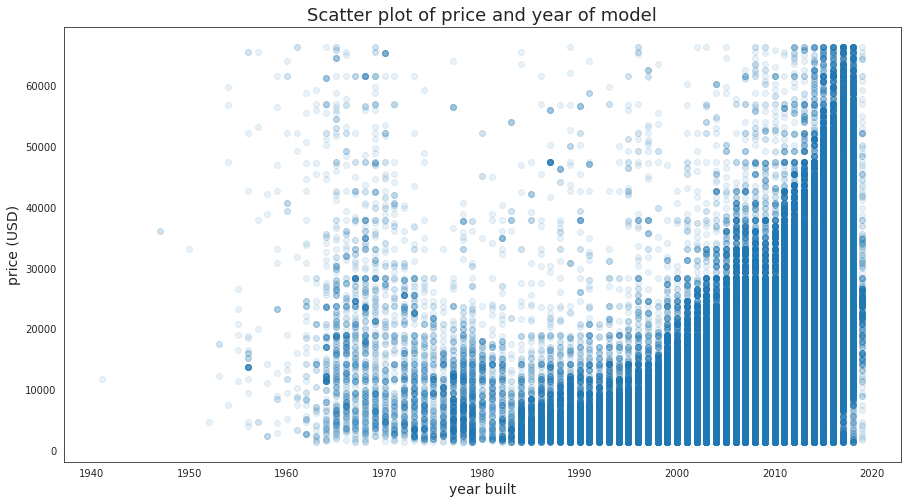

In [123]:
#viz
# here we set the figure size to 15x8
plt.figure(figsize=(15, 8))
# plot two values price per year_model
plt.scatter(X.year0,X.Price, alpha=0.1)
plt.xlabel("year built", fontsize=14)
plt.ylabel("price (USD)", fontsize=14)
plt.title("Scatter plot of price and year of model",fontsize=18)
plt.show()

In [137]:
#df.groupby(['make0', 'model0']).agg({'make0':'count'})
grouped = pd.pivot_table(X, values=['year0'], index=['Car'],aggfunc=len).reset_index()
grouped['Car'].sample(n=20)

41        Chevrolet TrailBlazer
139               Nissan Murano
98                INFINITI G 37
112                    Kia Soul
122                 MINI Cooper
13                      BMW M 3
176           Volkswagen Passat
118                Lexus RX 350
172              Volkswagen GTI
25          Chevrolet Avalanche
121            Lincoln Town Car
130        Mercedes Benz GL 450
4                      Audi A 6
129         Mercedes Benz E 350
83                 GMC Yukon XL
80              GMC Sierra 2500
109                  Kia Optima
36     Chevrolet Silverado 2500
117                Lexus IS 250
11                    BMW 528 i
Name: Car, dtype: object

In [125]:
#grouped = pd.pivot_table(df[df['model0'].isnull()], values=['ID'], index=['make0'],aggfunc=len).reset_index()
#grouped.sort_values(['ID'], ascending=[1])

In [138]:
#X[['year0','Car','odometer','Price']][(X['status']=='clean')&(X['year0']>2000)].dropna().sort_values(['Price'], ascending=[0]).head()
X1=X[['year0','Car','odometer','Price']][(X['status']=='clean')&(X['year0']>2000)].dropna()
X1.dtypes

year0         int64
Car          object
odometer      int64
Price       float64
dtype: object

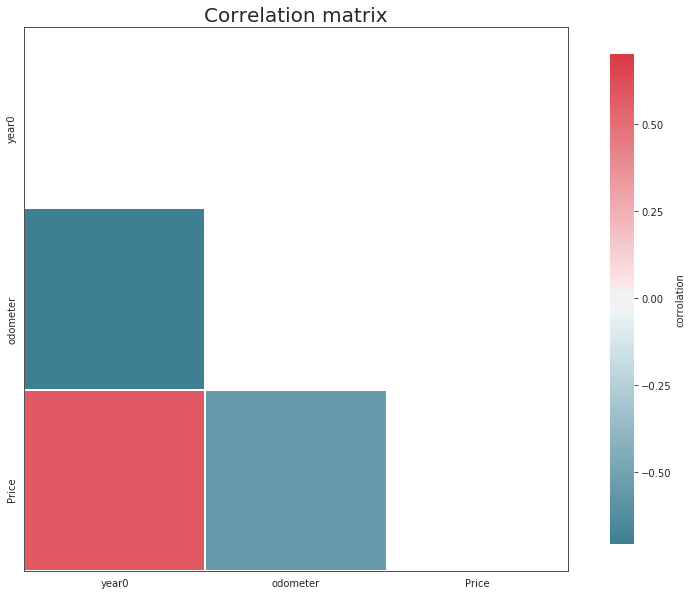

In [139]:
import seaborn as sns
%matplotlib inline

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))
# Compute the correlation matrix
corr = X1.corr()
#print(corr)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap with the mask and correct aspect ratio
ax=sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.7, center=0,
            square=True, linewidths=.9, cbar_kws={"shrink": .9,'label': 'corrolation'})
for _, spine in ax.spines.items():
    spine.set_visible(True)
plt.title('Correlation matrix', 
          fontsize = 20)
plt.show()

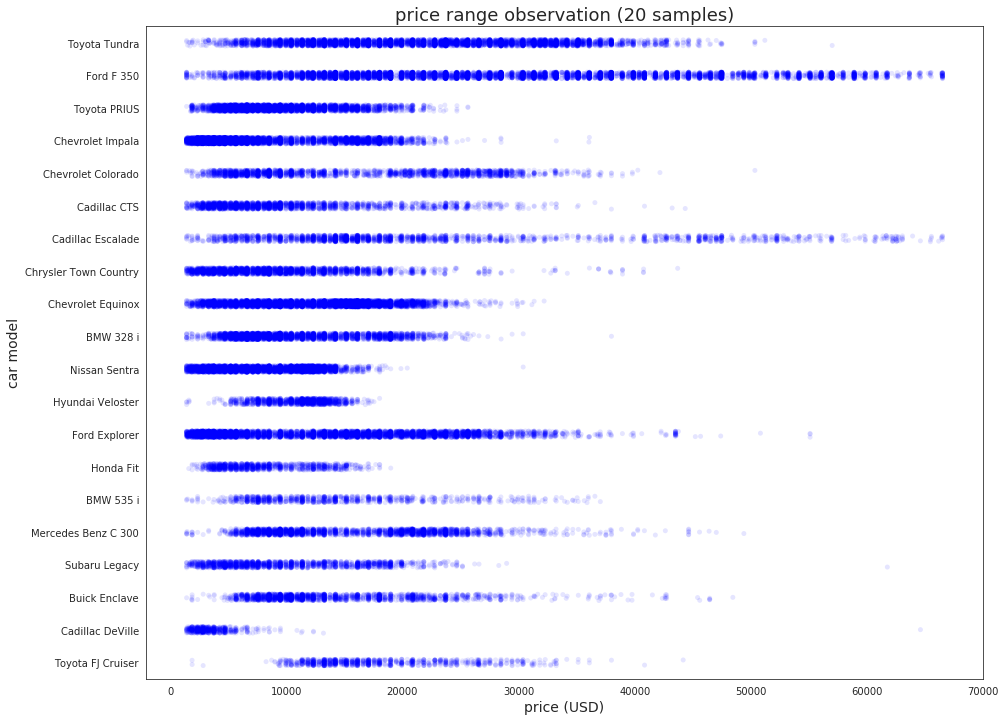

In [140]:
f, ax = plt.subplots(figsize=(15, 12))
sns.stripplot(data = X[(X['Car'].isin(grouped['Car'].sample(n=20)))&(X['status']=='clean')&(X['year0']>2000)], x='Price', y='Car', jitter=.1,color='blue',alpha=.1)
plt.xlabel("price (USD)", fontsize=14)
plt.ylabel("car model", fontsize=14)
plt.title("price range observation (20 samples)",fontsize=18)
plt.show()

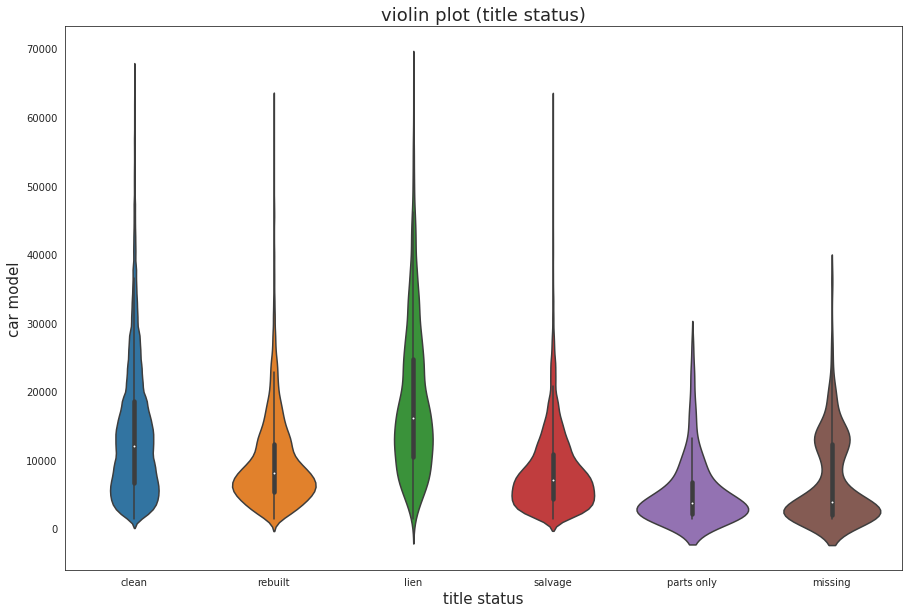

In [142]:

f, ax = plt.subplots(figsize=(15, 10))
sns.violinplot(data = X, x='status', y='Price')

plt.xlabel("title status", fontsize=15)
plt.ylabel("car model", fontsize=15)
plt.title("violin plot (title status)",fontsize=18)
plt.show()

In [143]:
#dfg = df.groupby(['store', 'product']).agg({'sales': ['sum', 'count'], 'rating': 'mean'})
#df.groupby(['make0', 'model0']).size().unstack(level=1, fill_value=0)
#df.groupby(['make0', 'model0']).agg({'make0':'count'})
#grouped = pd.pivot_table(X, values=['year0'], index=['Car'],aggfunc=len).reset_index()
grouped.sort_values(['year0'], ascending=[1]).head()

,Car,year0
58,Ford Crown Victoria,1006
119,Lincoln MKX,1007
130,Mercedes Benz GL 450,1009
43,Chevrolet Volt,1015
178,Volvo S 60,1018


In [19]:
#from sklearn.ensemble import GradientBoostingRegressor
# get an instance of the model, using ‘ls’ : least squares regression as a loss function and the default learning rate which 0.1
#gbr = GradientBoostingRegressor(loss ='ls', max_depth=6)
# fit the training data
#gbr.fit (X, Y)
# get the predicted values from the test set
#predicted = gbr.predict(X_test)
# extract the residual values
#residual = Y_test - predicted


In [93]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
#from sklearn.feature_extraction import DictVectorizer
#from sklearn.linear_model import Ridge
#from sklearn.preprocessing import Imputer, PolynomialFeatures, StandardScaler, OneHotEncoder, MinMaxScaler
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.model_selection import GridSearchCV
#from sklearn.preprocessing import Imputer
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import GridSearchCV
#from sklearn.pipeline import Pipeline
#import numpy as np
ct_transformer = ColumnTransformer(
    [('oh_enc', OneHotEncoder(sparse=False), [1]),],  # the column numbers I want to apply this to
    remainder='passthrough'  # This leaves the rest of my columns in place
)
car_est=Pipeline([
    ('ct' , ct_transformer ),
    ('scl', StandardScaler()),
    ('gbr', GradientBoostingRegressor(loss ='ls', max_depth=6)),
])

car_est.fit(X1[['year0','Car','odometer']],X1[['Price']])

#ct.fit_transform(X.head())

/opt/conda/envs/data3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
     steps=[('ct', ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('oh_enc', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=Non...one, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False))])

In [116]:
y_real=y[(X['status']=='clean')&(X['Car']=='Toyota Corolla')&(X['year0']==2014)]
y_predicted=car_est.predict(X[(X['status']=='clean')&(X['Car']=='Toyota Corolla')&(X['year0']==2014)])

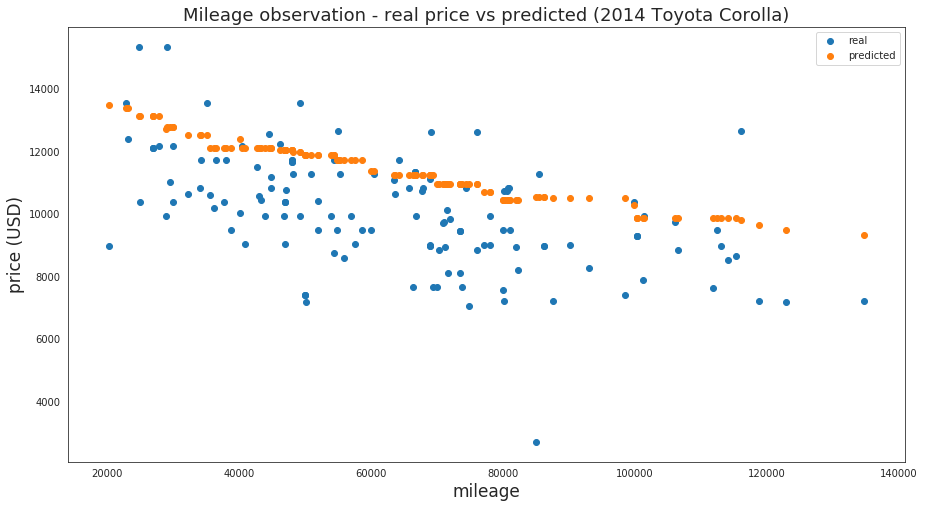

In [118]:
#viz
# here we set the figure size to 15x8
plt.figure(figsize=(15, 8))
# plot two values price per year_model
plt.scatter(X1[(X1['Car']=='Toyota Corolla')&(X1['year0']==2014)].odometer, y_real, label="real")
plt.scatter(X1[(X1['Car']=='Toyota Corolla')&(X1['year0']==2014)].odometer, y_predicted, label="predicted")
#plt.plot(X[(X['status']=='clean')&(X['Car']=='Toyota Corolla')&(X['year0']==2014)].Miles,y_predicted, label="Predicted")
plt.xlabel("mileage", fontsize=17)
plt.ylabel("price (USD)", fontsize=17)
plt.title("Mileage observation - real price vs predicted (2014 Toyota Corolla)",fontsize=18)
plt.legend()
plt.show()

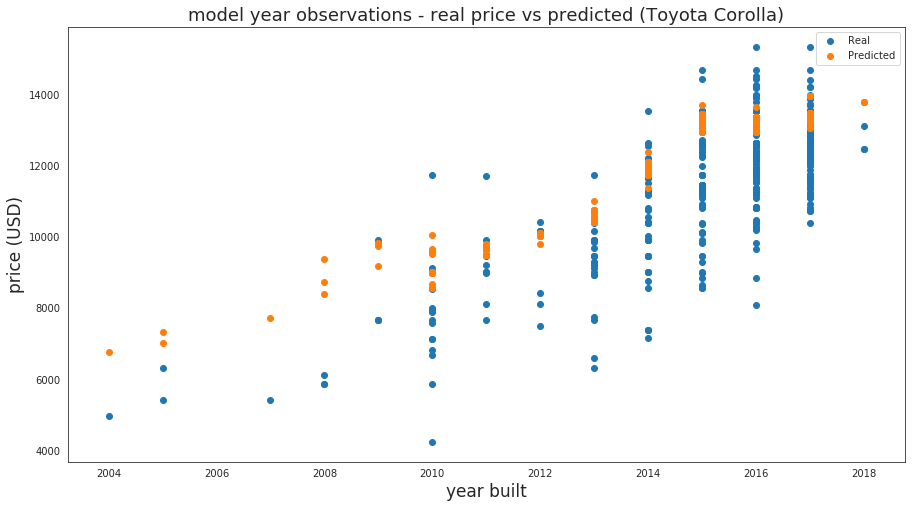

In [113]:
y_real=X1['Price'][(X1['Car']=='Toyota Corolla')&(X1['odometer']>=40000) &(X1['odometer']<=60000)]
y_predicted=car_est.predict(X1[(X1['Car']=='Toyota Corolla')&(X1['odometer']>=40000) &(X1['odometer']<=60000)])
#viz
# here we set the figure size to 15x8
plt.figure(figsize=(15, 8))

#plt.rcParams['figure.figsize'] = 16,5
# plot two values price per year_model
plt.scatter(X1[(X1['Car']=='Toyota Corolla')&(X1['odometer']>=40000) &(X1['odometer']<=60000)].year0, y_real, label="Real")
plt.scatter(X1[(X1['Car']=='Toyota Corolla')&(X1['odometer']>=40000) &(X1['odometer']<=60000)].year0, y_predicted, label="Predicted")
#plt.plot(X[(X['status']=='clean')&(X['Car']=='Toyota Corolla')&(X['year0']==2014)].Miles,y_predicted, label="Predicted")
plt.xlabel("year built", fontsize=17)
plt.ylabel("price (USD)", fontsize=17)
plt.title("model year observations - real price vs predicted (Toyota Corolla)",fontsize=18)
plt.legend()
plt.show()

In [9]:
#X[['year0','Car','odometer','Price']][(X['status']=='clean')&(X['year0']>2000)].dropna().sort_values(['Price'], ascending=[0]).head()
X4=X3[['year0','make0','model0','odometer','Price']][(X3['status']=='clean')&(X3['year0']>2000)].dropna()
X4.dtypes

year0         int64
make0        object
model0       object
odometer      int64
Price       float64
dtype: object

In [10]:
#separate make model
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
#from sklearn.feature_extraction import DictVectorizer
#from sklearn.linear_model import Ridge
#from sklearn.preprocessing import Imputer, PolynomialFeatures, StandardScaler, OneHotEncoder, MinMaxScaler
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.model_selection import GridSearchCV
#from sklearn.preprocessing import Imputer
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import GridSearchCV
#from sklearn.pipeline import Pipeline
#import numpy as np
ct_transformer = ColumnTransformer(
    [('oh_enc', OneHotEncoder(sparse=False), [1,2]),],  # the column numbers I want to apply this to
    remainder='passthrough'  # This leaves the rest of my columns in place
)
car_est=Pipeline([
    ('ct' , ct_transformer ),
    ('scl', StandardScaler()),
    ('gbr', GradientBoostingRegressor(loss ='ls', max_depth=6)),
])

car_est.fit(X4[['year0','make0','model0','odometer']],X4[['Price']])

#ct.fit_transform(X.head())

/opt/conda/envs/data3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
     steps=[('ct', ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('oh_enc', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=Non...one, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False))])

In [11]:
car_est.score(X4[['year0','make0','model0','odometer']],X4['Price'])

0.8170683140999258

In [192]:
y_real=X4['Price'][(X4['make0']=='Toyota')&(X4['model0']=='Corolla')&(X4['year0']==2014)]
y_predicted=car_est.predict(X4[(X4['make0']=='Toyota')&(X4['model0']=='Corolla')&(X4['year0']==2014)])

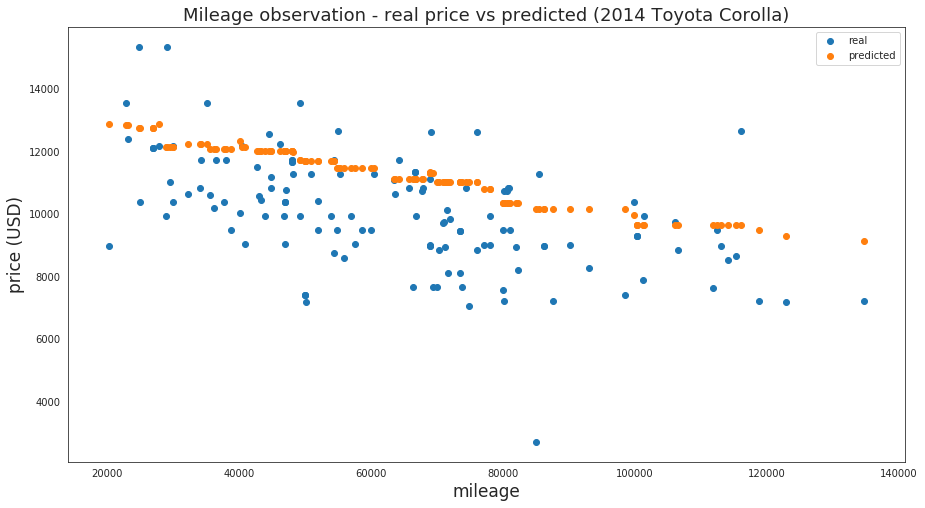

In [193]:
#viz
# here we set the figure size to 15x8
plt.figure(figsize=(15, 8))
# plot two values price per year_model
plt.scatter(X4[(X4['make0']=='Toyota')&(X4['model0']=='Corolla')&(X4['year0']==2014)].odometer, y_real, label="real")
plt.scatter(X4[(X4['make0']=='Toyota')&(X4['model0']=='Corolla')&(X4['year0']==2014)].odometer, y_predicted, label="predicted")
#plt.plot(X[(X['status']=='clean')&(X['Car']=='Toyota Corolla')&(X['year0']==2014)].Miles,y_predicted, label="Predicted")
plt.xlabel("mileage", fontsize=17)
plt.ylabel("price (USD)", fontsize=17)
plt.title("Mileage observation - real price vs predicted (2014 Toyota Corolla)",fontsize=18)
plt.legend()
plt.show()

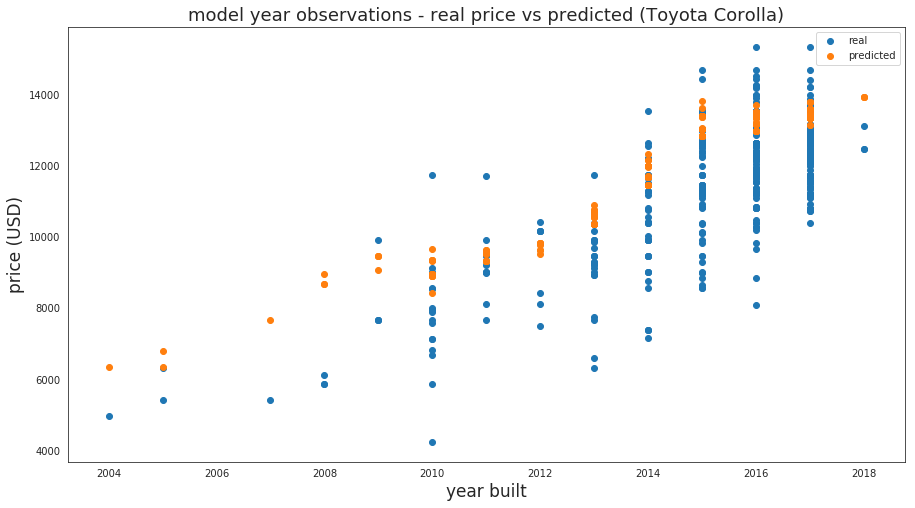

In [196]:
y_real=X4['Price'][(X4['make0']=='Toyota')&(X4['model0']=='Corolla')&(X1['odometer']>=40000) &(X4['odometer']<=60000)]
y_predicted=car_est.predict(X4[(X4['make0']=='Toyota')&(X4['model0']=='Corolla')&(X4['odometer']>=40000) &(X4['odometer']<=60000)])
#viz
# here we set the figure size to 15x8
plt.figure(figsize=(15, 8))

#plt.rcParams['figure.figsize'] = 16,5
# plot two values price per year_model
plt.scatter(X4[(X4['make0']=='Toyota')&(X4['model0']=='Corolla')&(X4['odometer']>=40000) &(X4['odometer']<=60000)].year0, y_real, label="real")
plt.scatter(X4[(X4['make0']=='Toyota')&(X4['model0']=='Corolla')&(X4['odometer']>=40000) &(X4['odometer']<=60000)].year0, y_predicted, label="predicted")
#plt.plot(X[(X['status']=='clean')&(X['Car']=='Toyota Corolla')&(X['year0']==2014)].Miles,y_predicted, label="Predicted")
plt.xlabel("year built", fontsize=17)
plt.ylabel("price (USD)", fontsize=17)
plt.title("model year observations - real price vs predicted (Toyota Corolla)",fontsize=18)
plt.legend()
plt.show()

/opt/conda/envs/data3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


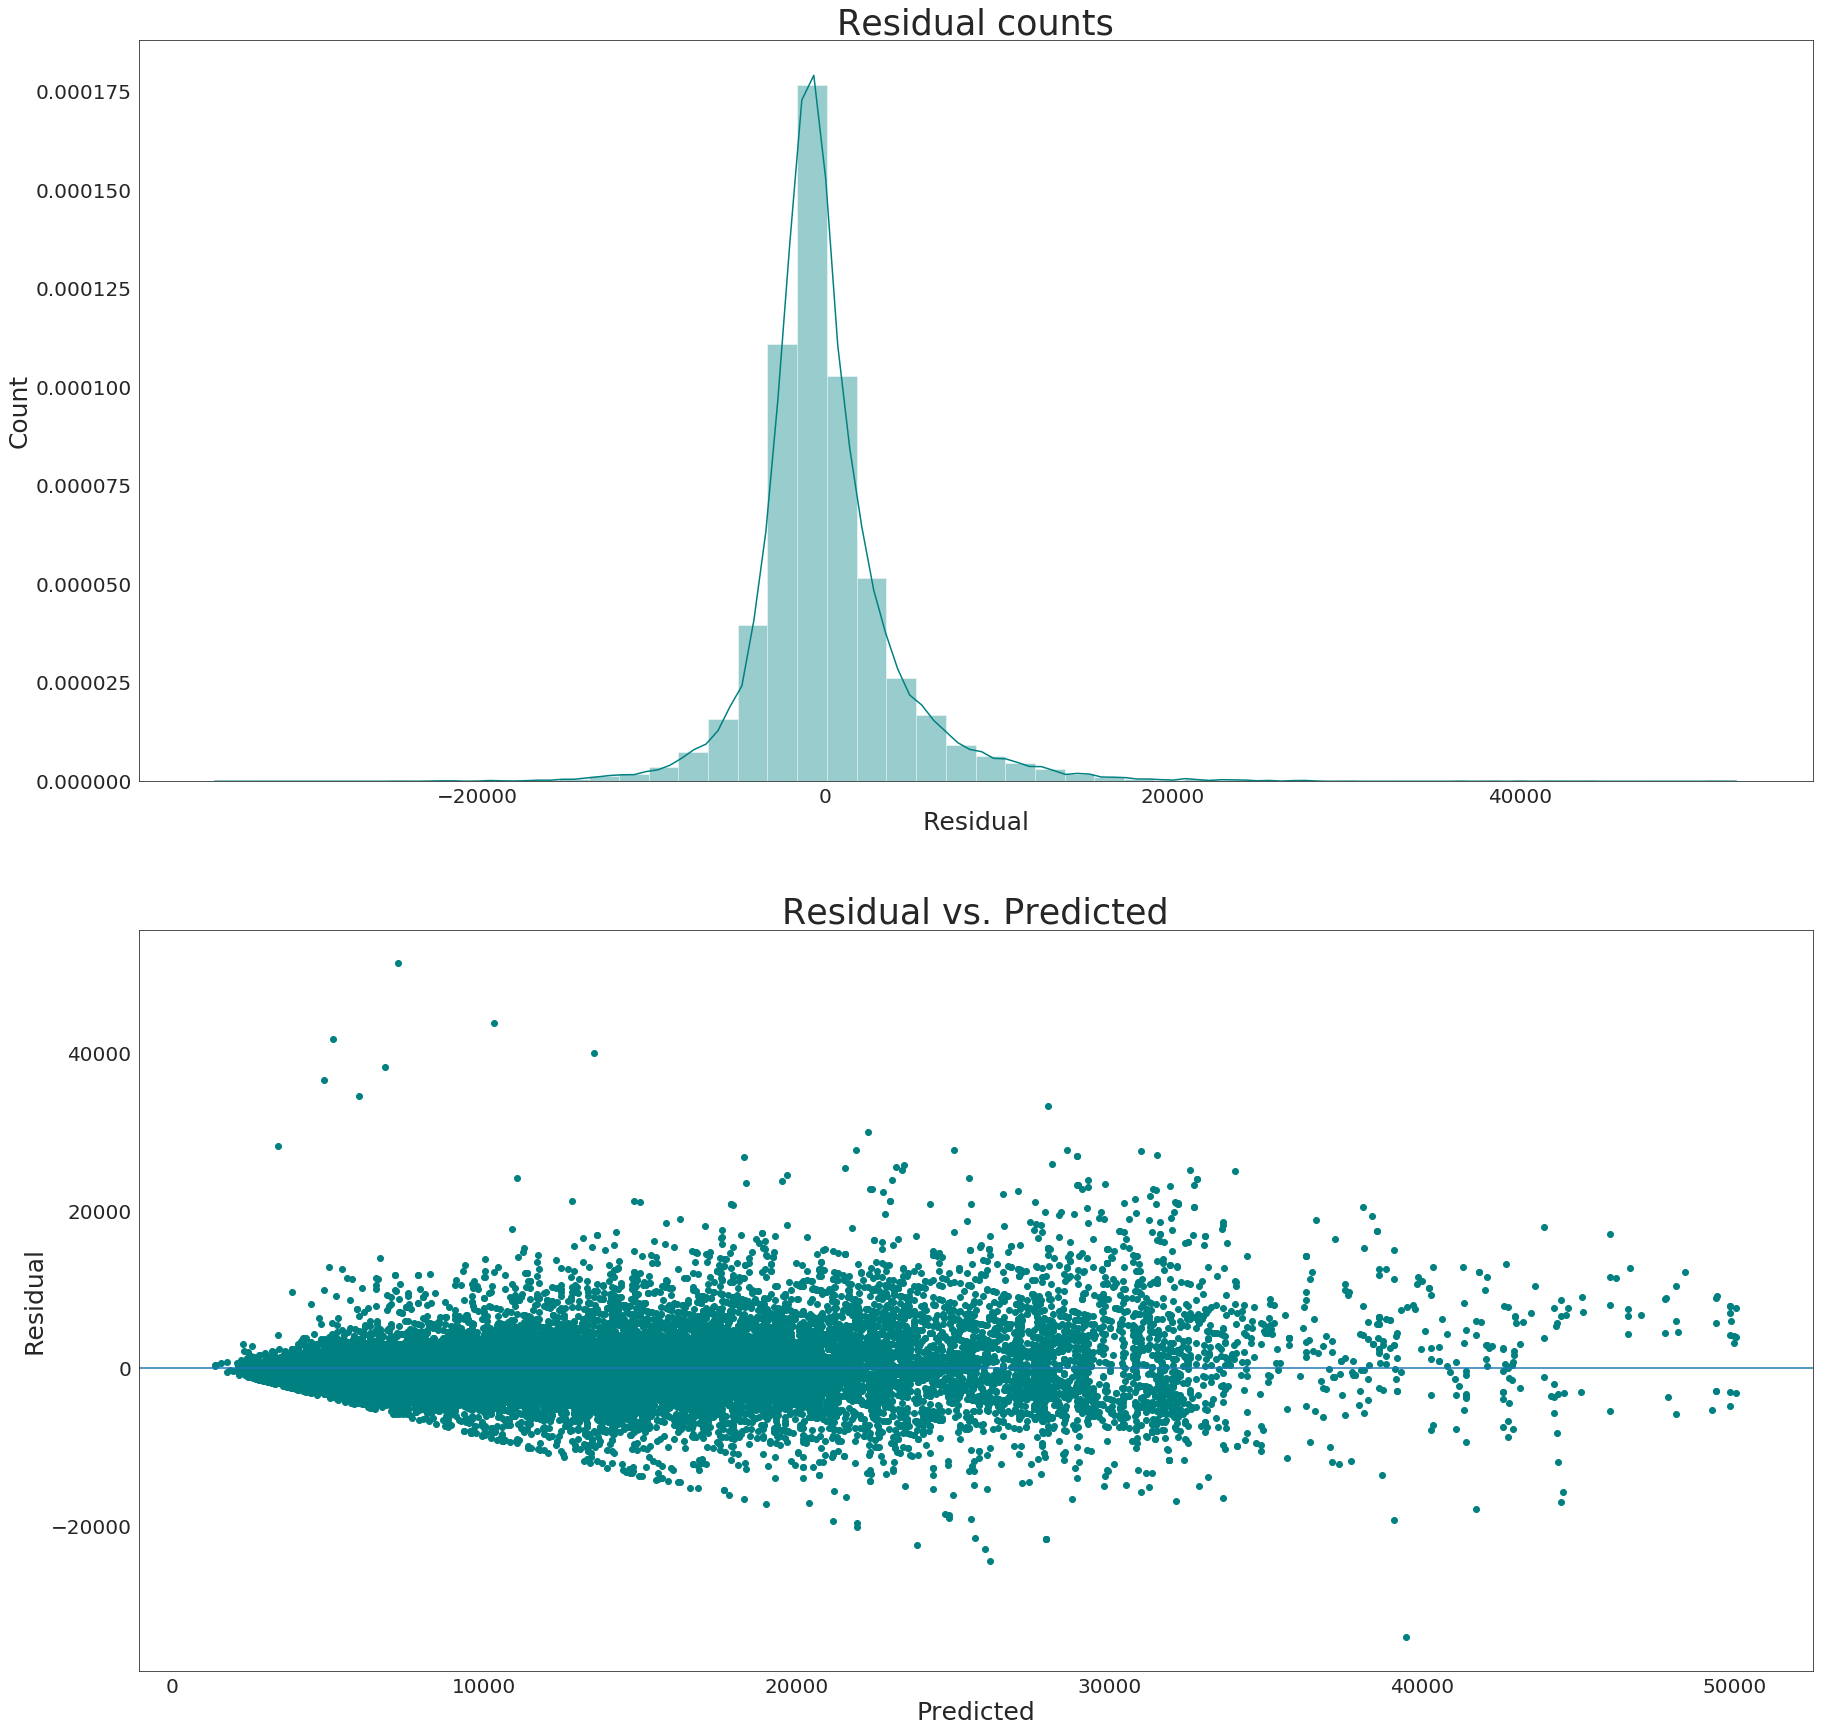

In [13]:
#cross validation
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X4[['year0','make0','model0','odometer']],X4[['Price']], test_size=0.2, random_state=42,shuffle=True)

ct_transformer = ColumnTransformer(
    [('oh_enc', OneHotEncoder(sparse=False), [1,2]),],  # the column numbers I want to apply this to
    remainder='passthrough'  # This leaves the rest of my columns in place
)
car_est=Pipeline([
    ('ct' , ct_transformer ),
    ('scl', StandardScaler()),
    ('gbr', GradientBoostingRegressor(loss ='ls', max_depth=6)),
])

car_est.fit (X_train, y_train)
predicted = car_est.predict(X_test)
residual = y_test['Price'] - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

        

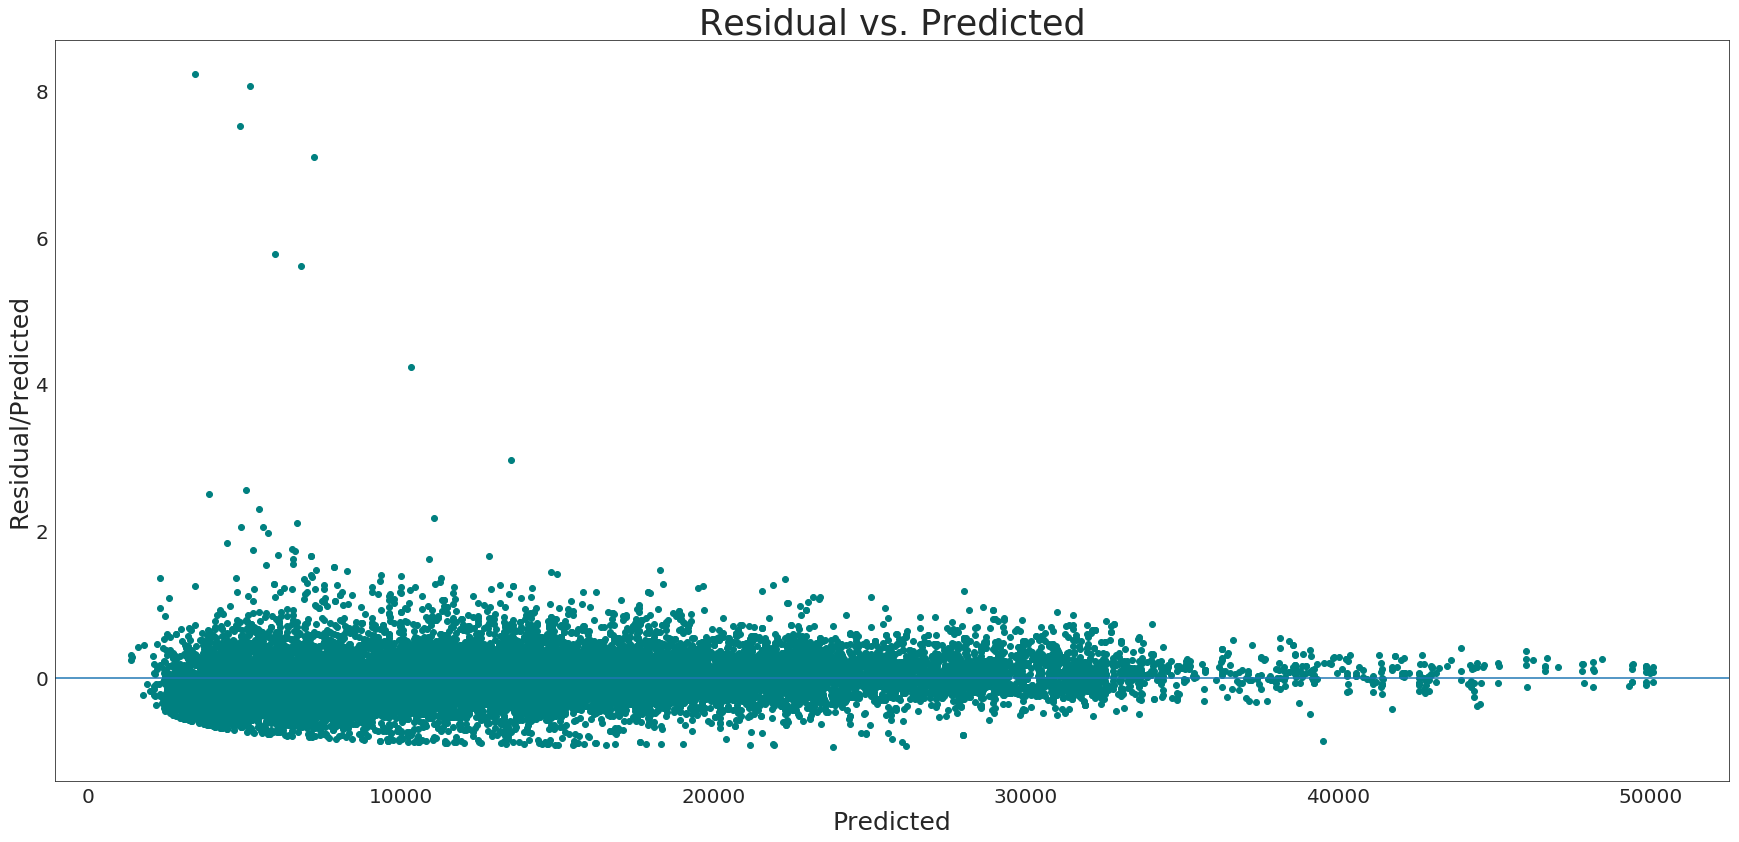

In [36]:
fig = plt.figure(figsize=(30,30))
ax2 = plt.subplot(212)
plt.scatter(predicted, np.asanyarray(residual)/predicted, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual/Predicted',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

In [17]:
np.asanyarray(residual)

array([-4115.20069701,  -374.98843442, -3279.4889696 , ...,
       -6008.43149472, -1089.59961165, -2349.09950284])

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, predicted))
scores = cross_val_score(car_est, X4[['year0','make0','model0','odometer']],X4['Price'], cv=12)

print('\nCross Validation Scores:')
print(scores)
print('\nMean Score:')
print(scores.mean())
print('\nRMSE:')
print(rmse)

#car_est.fit(X_train, y_train)
#pred=car_est.predict(X_test)
#score = -cross_val_score(car_est, X_test, y_test,cv=10, scoring='neg_mean_squared_error').mean()
#print(score)

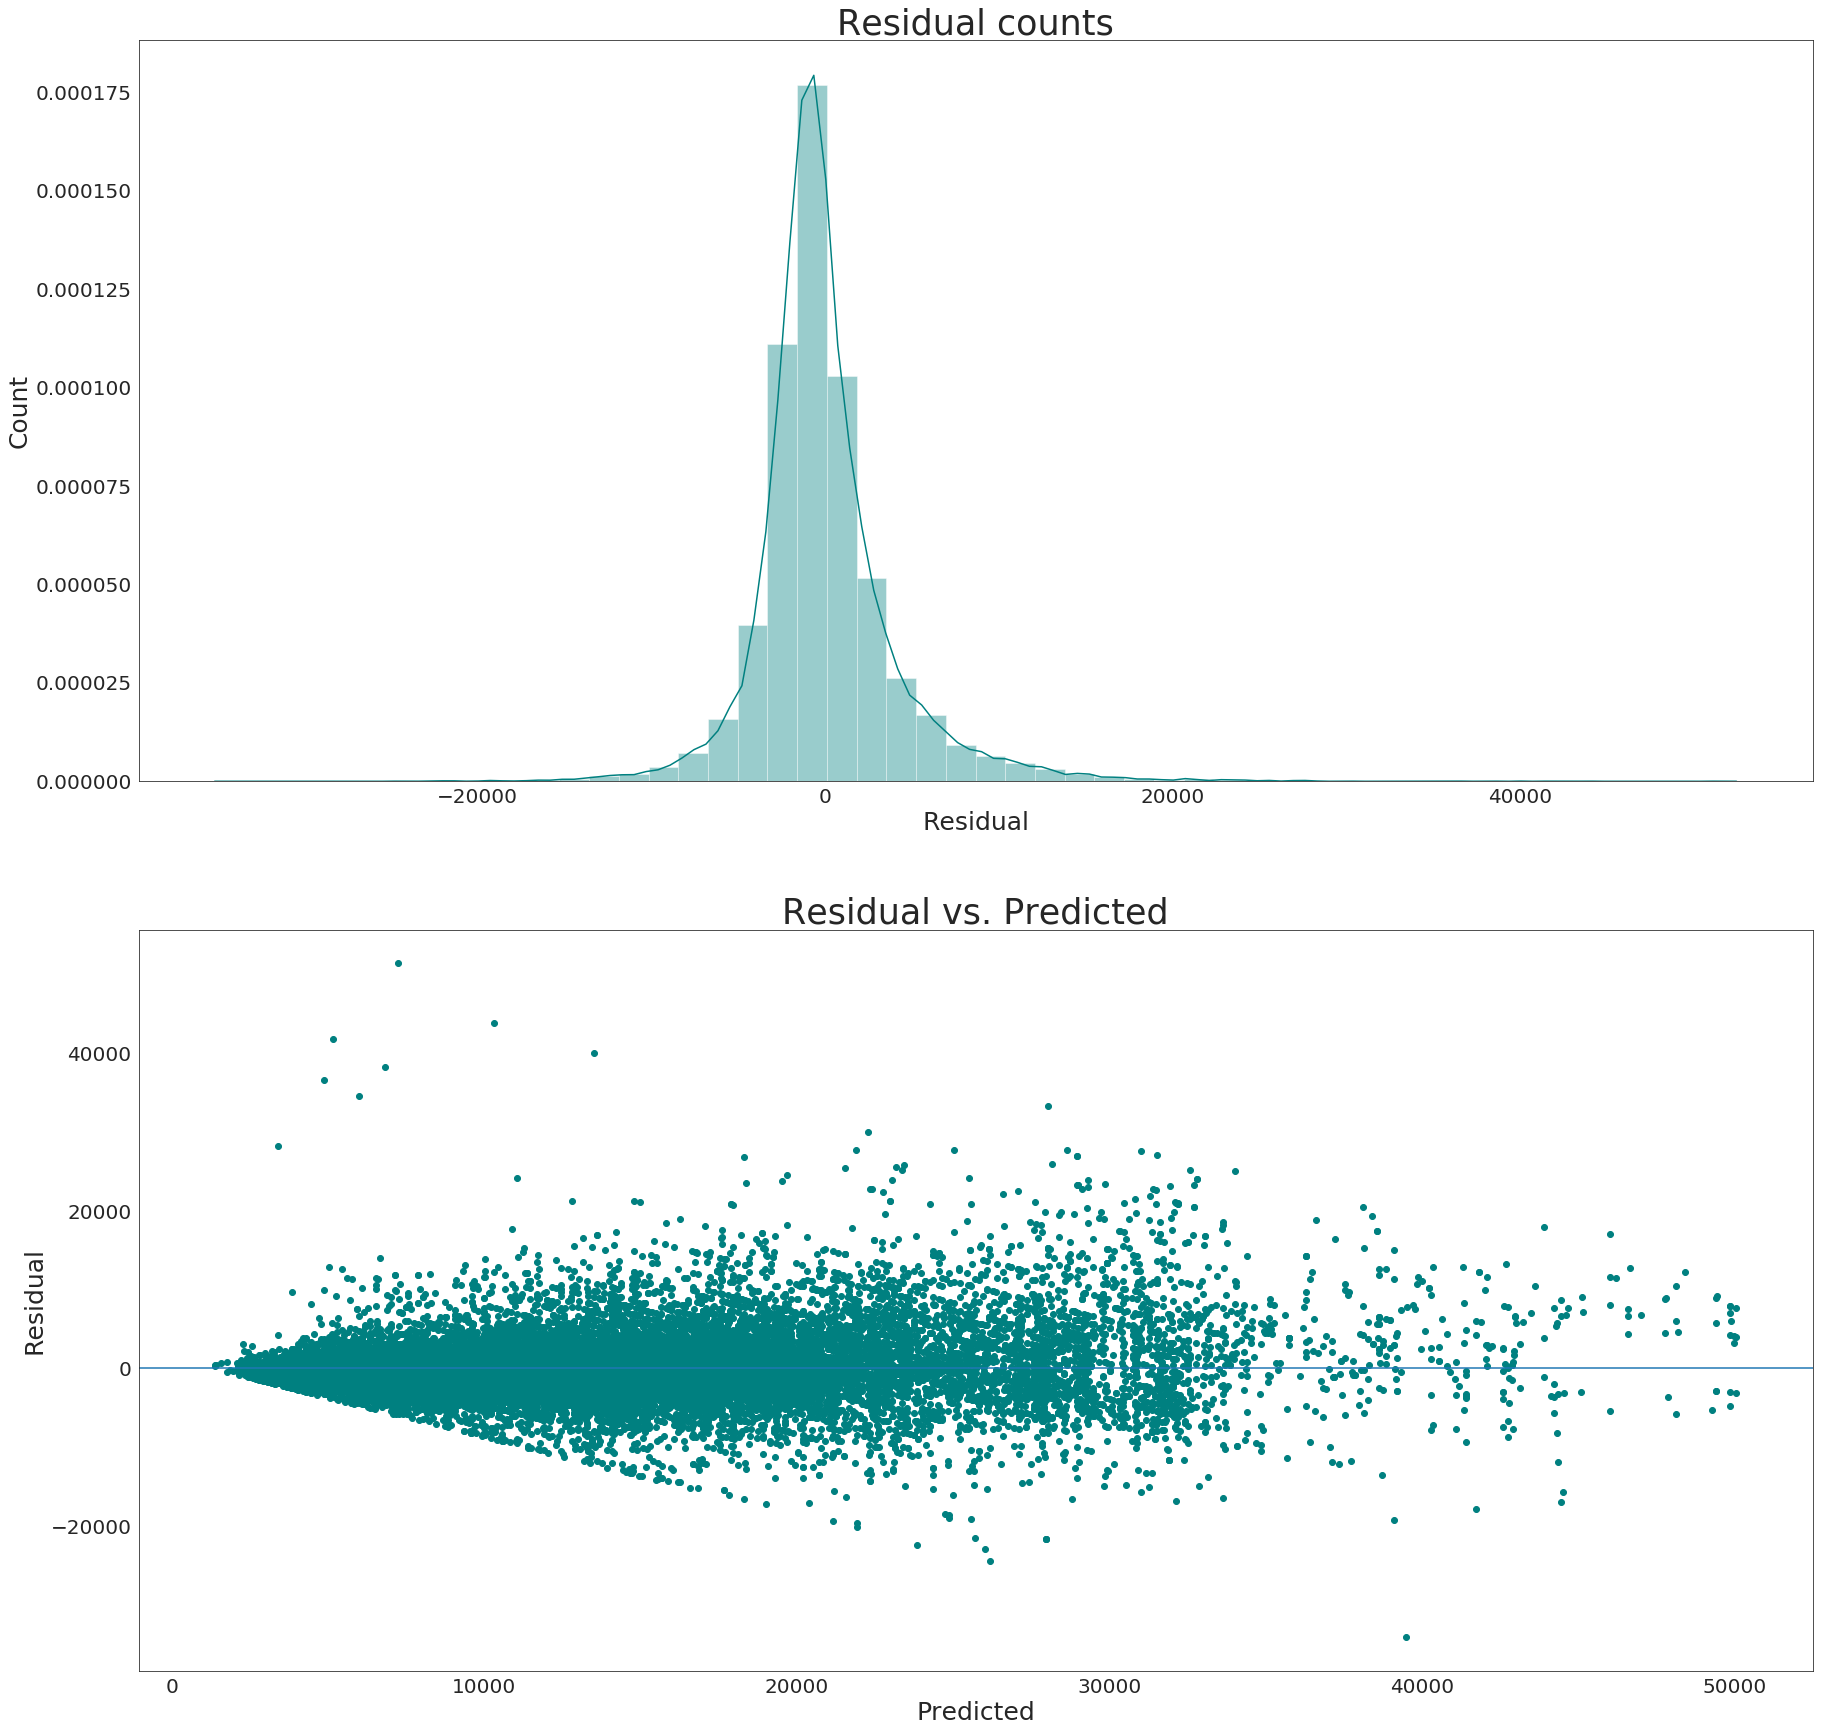


Cross Validation Scores:
[0.81984112 0.80512939 0.79576347 0.80716518 0.80335399 0.81817161
 0.78322116 0.79951559 0.82980745 0.79907459 0.8201084  0.80059822]

Mean Score:
0.8068125126675119

RMSE:
3974.902501873213


In [208]:
from sklearn.metrics import mean_squared_error
residual = y_test['Price'] - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

rmse = np.sqrt(mean_squared_error(y_test, predicted))
scores = cross_val_score(car_est, X4[['year0','make0','model0','odometer']],X4['Price'], cv=12)

print('\nCross Validation Scores:')
print(scores)
print('\nMean Score:')
print(scores.mean())
print('\nRMSE:')
print(rmse)

#car_est.fit(X_train, y_train)
#pred=car_est.predict(X_test)
#score = -cross_val_score(car_est, X_test, y_test,cv=10, scoring='neg_mean_squared_error').mean()
#print(score)

In [7]:
score = -cross_val_score(car_est, X_test, y_test,cv=10, scoring='neg_mean_squared_error').mean()
print(score)

/opt/conda/envs/data3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/data3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/data3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/data3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

22416381.40220494


In [7]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#from sklearn.feature_extraction import DictVectorizer
#from sklearn.linear_model import Ridge
#from sklearn.preprocessing import Imputer, PolynomialFeatures, StandardScaler, OneHotEncoder, MinMaxScaler
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.model_selection import GridSearchCV
#from sklearn.preprocessing import Imputer
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X[['year0','Car','Miles']],y, test_size=0.2, random_state=42,shuffle=True)
ct_transformer = ColumnTransformer(
    [('oh_enc', OneHotEncoder(sparse=False), [1]),],  # the column numbers I want to apply this to
    remainder='passthrough'  # This leaves the rest of my columns in place
)
car_est=Pipeline([
    ('ct' , ct_transformer ),
    ('scl', StandardScaler()),
    ('gbr', GradientBoostingRegressor(loss ='ls', max_depth=6)),
])
car_est.fit (X_train, y_train)
predicted = car_est.predict(X_test)
residual = y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

rmse = np.sqrt(mean_squared_error(y_test, predicted))
scores = cross_val_score(car_est, [['year0','Car','Miles']], y, cv=12)

print('\nCross Validation Scores:')
print(scores)
print('\nMean Score:')
print(scores.mean())
print('\nRMSE:')
print(rmse)

/opt/conda/envs/data3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unable to coerce to Series, length must be 1: given 33071

In [ ]:
np.asanyarray(y_test) - predicted

In [ ]:
print('Variance score: %.2f' % r2_score(y_test, predicted))

In [8]:
from sklearn.metrics import r2_score
r2_score(y.head(), car_est.predict(X.head()))

/opt/conda/envs/data3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.9253051556480631

In [6]:
X

array([[0., 1., 2., 2.],
       [1., 1., 0., 1.]])

In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer
import numpy as np
ct = ColumnTransformer([("norm1", Normalizer(norm='l1'), [0, 1]),
                        ("norm2", Normalizer(norm='l1'), slice(2, 4))])
X = np.array([[0., 1., 2., 2.],
              [1., 1., 0., 1.]])
# Normalizer scales each row of X to unit norm. A separate scaling
# is applied for the two first and two last elements of each

# row independently.
ct.fit_transform(X)

array([[0. , 1. , 0.5, 0.5],
       [0.5, 0.5, 0. , 1. ]])

In [13]:
np.asanyarray(y)


array([[42500],
       [16250],
       [15000],
       ...,
       [ 6994],
       [ 3400],
       [ 6991]])